In [ ]:
# Written with help from the Full Control documentation Jupyter notebooks
# Created by Hannah Eikens for Final Bachelor Project @ TU/e, department of Industrial Design

In [ ]:
import fullcontrol as fc
from fabulousfeathers import FabulousFeather
from math import pi, tau, tan, floor, sqrt

## Printer Calibration

### Extruder Calibration

Before starting any 3D print, it is important to verify a printer extrudes the requested amount of plastic. This is usually done by marking 100mm of filament and accordingly request 100mm of filament to be extruded by your printer. You can now calculate the percentual difference in actual and requested extrusion rate. This is then used to recalculate the printer's e-steps(Marlin) or `rotation_distance`(Klipper). For a complete guide on tuning a 3D printer's extruder, refer to [Extruder Calibration](https://ellis3dp.com/Print-Tuning-Guide/articles/extruder_calibration.html) by Ellis3DP

### First Layer Squish and Z-Offset

If a 3D print is to stick to the print bed during a print, it must have enough squish in order for it to do so. However, very often this layer is over squished. For a complete guide on dialing in you z-offset check out [First Layer Squish](https://ellis3dp.com/Print-Tuning-Guide/articles/first_layer_squish.html) from Ellis3DP's Print Tuning Guide. 
Also make sure your print bed is properly cleaned in order for the plastic to stick.
If you experience the barbs sticking together, increase z-offset.  
If you still experience the barbs sticking together, despite z-offset tuning, concider increasing the `barb_spacing`.
In some senarios the barbs will stick together due to expasion of extruded material (e.g. thermal expansion or die swell), decrease `material_flow_percentage` or extrusion-multiplier/flow accordingly for your filament. Follow Ellis3DP's [Extrusion Multiplier] guide for robust method on approaching optimal extrusion rates.

## Printer Parameters

These settings serve as a baseline for any FFF 3D printer. This design was succesfully printer on a Voron 0.1 using these settings. Adjust `printer_name` to whichever model printer you use or if your printer is not listed use the most similar kind. Otherwise use `'generic'` and make sure to manually include the appropriate start Gcode for your printer of choice.
If the print has trouble sticking, decrease `print_speed`.  
A parameter which is important to remember is the `quill_speed`, as it will be referred to later.

In [ ]:
# printer/gcode parameters

design_name = 'fabulous_feathers'
nozzle_diameter = 0.4 # mm
nozzle_temp = 220 # PET-G
bed_temp = 70 # PET-G
print_speed = 1000 # mm/min - print speed of the vane
quill_speed = 200 # mm/min - print speed of the quill and rachis
fan_percent = 0
retraction = True # enable if printer supports Gcode retraction
z_lift = 0.6 # mm - z_lift from vane to quill and rachis to rachis layers
material_flow_percent = 100
vane_pressure_advance = None # linear-advance/pressure-advance for vane
rachis_pressure_advance = None # linear-advance/pressure-advance for quill and rachis
printer_name='generic' # generic / ultimaker2plus / prusa_i3 / ender_3 / cr_10 / bambulab_x1 / toolchanger_T0

## Feather Design

The design of Fabulous Feathers aims to achieve geometry as close to biological feathers as Fused Filament Fabrication will allow. The geometry consists of a quill (or calamus), rachis and vane. The vane is built up of individual barbs.

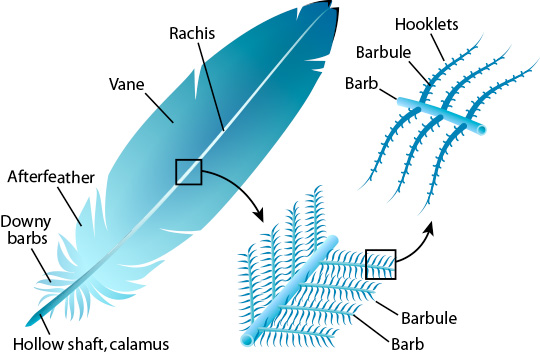
*picture sourced from: https://askabiologist.asu.edu/explore/feather-biology*

### Extrusion Width

For a comprehesive guide on extrusion width and it's effects on part strength, check out [CNC Kitchen's blog post](https://www.cnckitchen.com/blog/the-effect-of-extrusion-width-on-strength-and-quality-of-3d-prints)

### Maximum Extrusion Rate for Quill and Rachis

A key feature of the Fabulous Feathers' design is the tickly extruded quill and rachis. If your printer cannot handle the amount of plastic extruded for this design feature, reduce the `quill_speed`, `quill_width` or `quill_EH` accordingly. The quill and rachis consist of multiple thicker layers. These layers are calculated based on the `quill_height` and `quill_EH`. For the most transparant result, less layers are desirable.  
note: it is possible that your printer can extrude more plastic than configured by default, check out [CNC Kitchen](https://www.cnckitchen.com/blog/extrusion-system-benchmark-tool-for-fast-prints) for an accurate method to discover max flow rate or [Ellis3DP](https://ellis3dp.com/Print-Tuning-Guide/articles/determining_max_volumetric_flow_rate.html) for a quicker method. 

###  Adjust Design Parameters to Fit Your Needs

In order to achieve a feather which suits your application, change design parameters accordingly. The total length of the feather will be the `quill_length`, `afterfeather_length` and `rachis_length`.  
The width of the vane is set with `vane_width`. `vane_extent`determines how far the vane extends beyond the tip of the rachis.  
`barb_rachis_connection` ensures the barbs are fused good well enough to the rachis. 1.5 times the extrusion width of the vane (`EW`) works well, however if issues occur with barb and rachis fusion, increase `barb_rachis_connection`.

In [ ]:
# design parameters

EW = 1.0*nozzle_diameter # mm - extrusion width for vane
EH = 0.2 # mm - extrusion height for vane

x_offset = 15 # offset feather from home position x=0, y=0, z=0)
y_offset = 15

barb_spacing = 0.2 # mm - spacing in between barbs aka the "hairs" of the feather
barb_rachis_connection = 1.5*EW # mm - fusion distance of barb into the rachis
vane_width = 40 # mm - width of the hairy part of the feather
vane_rachis_extent = 7.5 # mm - distance which the vane extends past the tip of the rachis
rachis_length = 75 # mm - rachis aka shaft length to which the vane is attached
quill_length = 30 # mm - length of the end of the shaft
quill_width = 1.8 # mm - width of the quill
quill_EH = 0.5 # mm - extrusion height of the quill
quill_height = 2*quill_EH # mm - height of the quill
afterfeather_length = 30 # mm - shaft length of the afterfeather
afterfeather_extent = 2.75*afterfeather_length # mm - extent of afterfeather over the quill
wipe_distance = 0 # mm - wipe distance at end of quill [depricated]

fabulousfeather = FabulousFeather(start_point=fc.Point(x=x_offset, y=y_offset, z=0),
                                  EW=EW,
                                  EH=EH,
                                  barb_spacing=barb_spacing,
                                  barb_quill_connection=barb_rachis_connection,
                                  vane_width=vane_width,
                                  vane_rachis_extent=vane_rachis_extent,
                                  rachis_length=rachis_length,
                                  quill_length=quill_length,
                                  quill_width=quill_width,
                                  quill_EH=quill_EH,
                                  quill_height=quill_height,
                                  afterfeather_length=afterfeather_length,
                                  afterfeather_extent=afterfeather_extent,
                                  z_lift=z_lift,
                                  wipe_distance=wipe_distance,
                                  vane_speed=print_speed,
                                  quill_speed=quill_speed,
                                  retraction=retraction,
                                  vane_PA=vane_pressure_advance,
                                  rachis_PA=rachis_pressure_advance
                                 )

In [ ]:
# generate the design (make sure you've run the above cells before running this cell)

steps = []

steps = fc.move_polar(fabulousfeather.steps(), fc.Point(x=x_offset, y=y_offset, z=0), 0, pi/4)

## Inspect Design

Check the plot of the feather in order to ensure it printed with ample spacing from the edge of the bed. Adjust `x_offset`, `y_offset` and the design parameters accordingly to make sure the feather will fit on the print bed.

In [ ]:
# preview the design

fc.transform(steps, 'plot')
# uncomment the next line to create a neat preview (click the top-left button in the plot for a .png file) - post and tag @FullControlXYZ :)
# fc.transform(steps, 'plot', fc.PlotControls(neat_for_publishing=True)) 

In [ ]:
print(fc.transform(steps, 'gcode'))

## Generate Gcode file
Like mentioned earlier, if you are using `printer_name = 'generic'`, make sure to manually include appropriate start Gcode in the generated file. The file will be located in the same directory as this notebook.

In [ ]:
# create and download gcode for the design

gcode_controls = fc.GcodeControls(
    printer_name = printer_name, 
    save_as = design_name,
    initialization_data={
    'primer': 'front_lines_then_x', 
    'print_speed': print_speed,
    "nozzle_temp": nozzle_temp,
    "bed_temp": bed_temp,
    'fan_percent': fan_percent,
    "extrusion_width": EW,
    "extrusion_height": EH,
    "material_flow_percent": material_flow_percent
    }
)
gcode = fc.transform(steps, 'gcode', gcode_controls)